In [1]:
import numpy as np
import uproot4 as up
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
keys1 = [f"Th_zprof/Theta_hist_{d};1" for d in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]
keys2 = [f"Th_zprof/Theta_hist_C_{d};1" for d in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]
keys3 = [f"Th_zprof/EBeam_hist_{d};1" for d in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]

In [3]:
with up.open("codigo_17F/soma_n2_cut12.root") as file:
    index = np.random.randint(low = 0, high = len(keys1), size = 1)[0]
    # index = 5
    print(index)
    w1, xbins1 = file[keys1[index]].to_numpy()
    print(w1, xbins1)
    w2, xbins2 = file[keys2[index]].to_numpy()
    print(w2, xbins2)
    w3, xbins3 = file[keys3[index]].to_numpy()
    print(w3, xbins3)

8
[  0.   0.   0.   1.  33. 108. 134. 106.  98. 102. 107. 109. 114.  85.
  65.  38.  10.   3.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.] [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180.]
[ 0.  0.  0.  0.  2.  8. 13. 14.  9. 10. 16. 13. 13.  3. 10.  2.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.] [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   

In [4]:
# Energia do beam
centers = (xbins3[1:] + xbins3[:-1]) / 2
print(len(centers), len(w3))
# média ponderada
Ebeam = np.sum(centers * w3)/np.sum(w3)
print(Ebeam)

200 200
28.833034111310592


In [19]:
keys1[index]

'Th_zprof/Theta_hist_50;1'

In [18]:
np.sum(w3)

1272.0

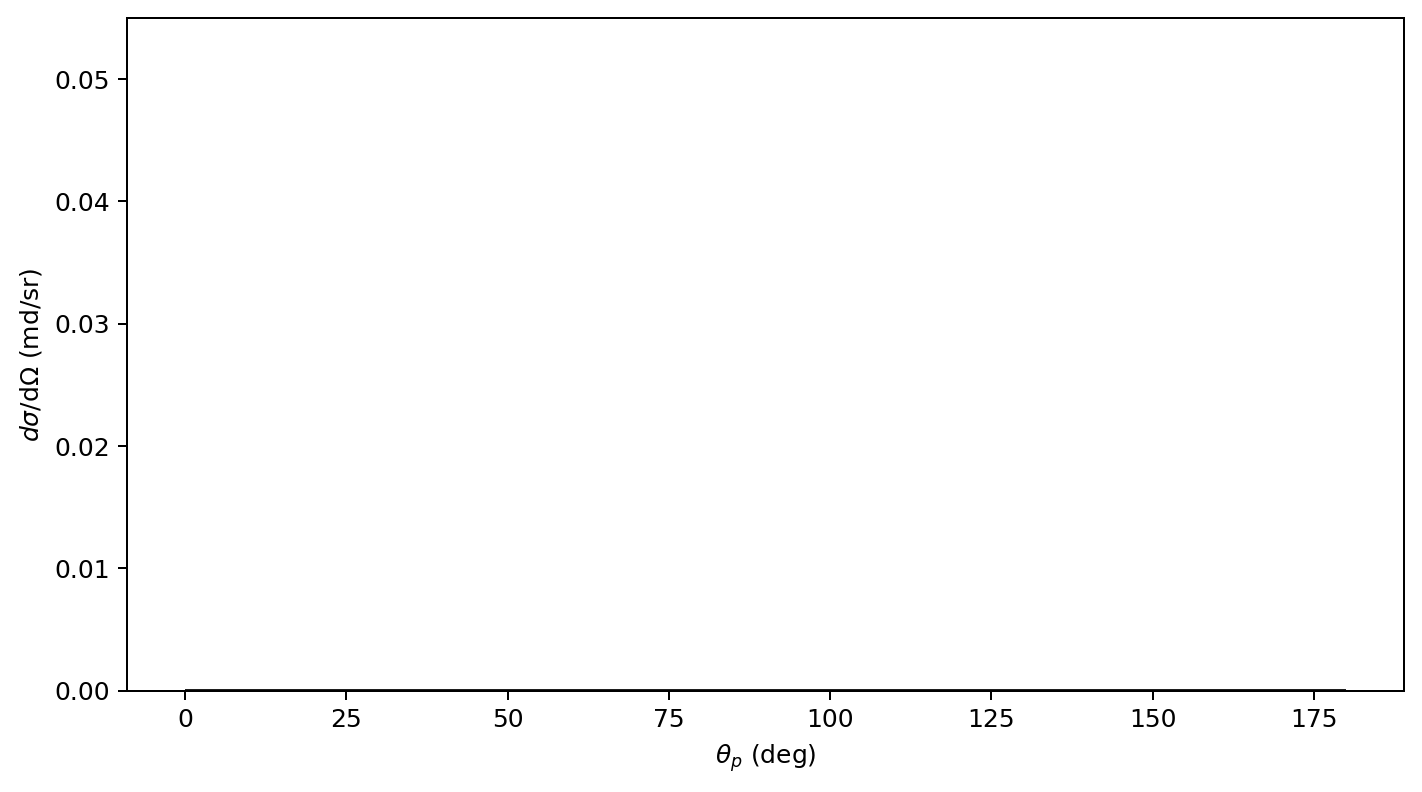

In [51]:
fig = plt.figure(dpi = 180, figsize = (8, 4.5))
centers = (xbins1[1:] + xbins1[:-1]) / 2
plt.hist(centers, bins = xbins1, weights=w1, histtype = "step", color = "black", linewidth = 1.5)
plt.xlabel(r"$\theta_p$ (deg)")
plt.ylabel("$d\sigma$/d$\Omega$ (md/sr)")
plt.ylim(bottom = 0.)
plt.tight_layout()
plt.show()


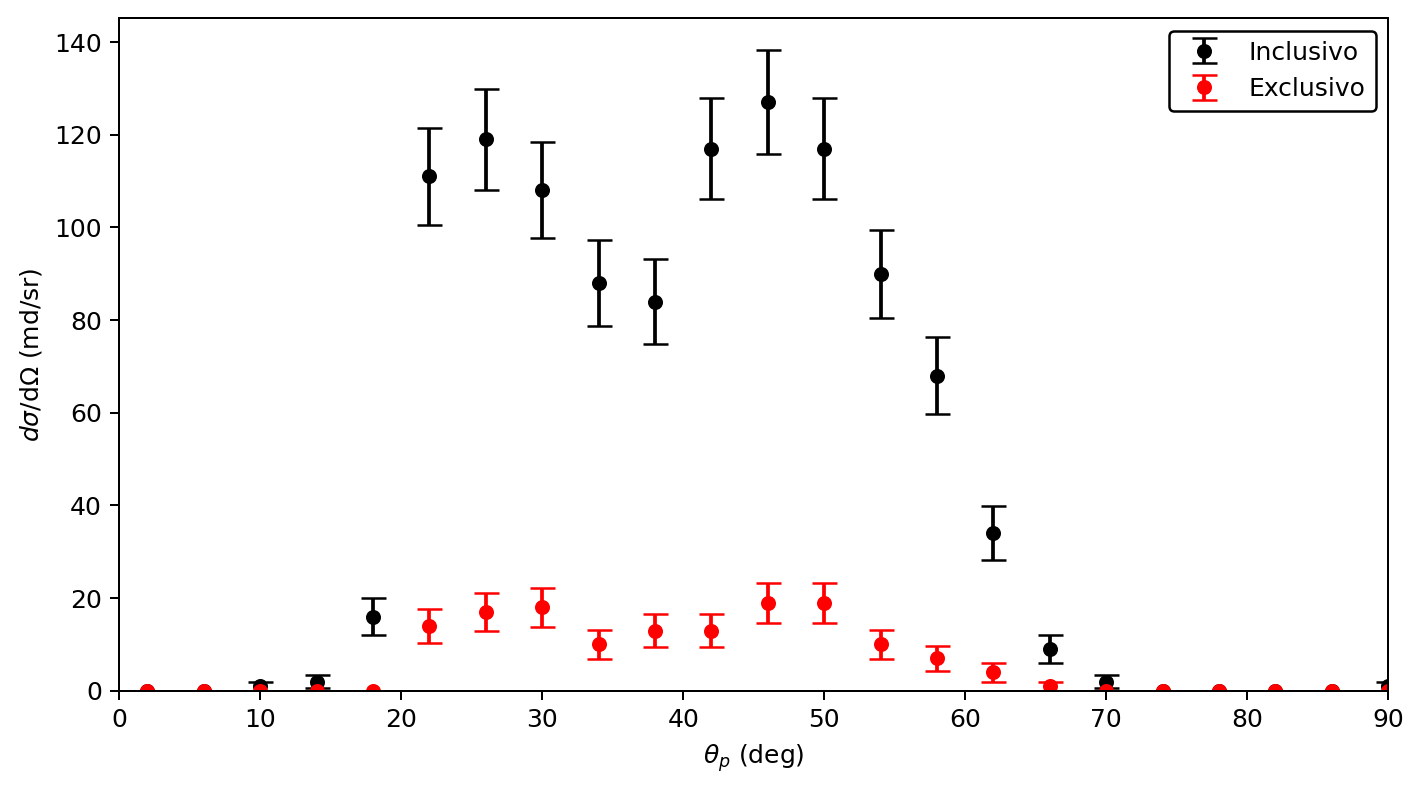

In [59]:
fig = plt.figure(dpi = 180, figsize = (8, 4.5))
centers1 = (xbins1[1:] + xbins1[:-1]) / 2
centers2 = (xbins2[1:] + xbins2[:-1]) / 2
plt.errorbar(centers1, w1, ms = 5,
 yerr= np.sqrt(w1), ecolor = "black", fmt="",
 capsize= 5, ls = "", marker = "o", c = "black", label = "Inclusivo")
plt.errorbar(centers2, w2, ms = 5,
    yerr= np.sqrt(w2), ecolor = "red", fmt="",
    capsize= 5, ls = "", marker = "o", c = "red", label = "Exclusivo")
plt.xlabel(r"$\theta_p$ (deg)")
plt.xlim(0, 90)
plt.ylabel("$d\sigma$/d$\Omega$ (md/sr)")
plt.ylim(bottom = 0.)
plt.legend(framealpha = 1., edgecolor = "black")
plt.tight_layout()
plt.show()